# Feature Selection with Sklearn

Remove zero variance features.

0 is in the first position & 3 is in the last position for all observations. So, these features will not be useful.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

X = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
sel = VarianceThreshold()
sel.fit_transform(X)

array([[2, 0],
       [1, 4],
       [1, 1]])

Remove low variance features.

>80% of observations contain 0 in first position, so it is not likely to be a useful feature

In [ ]:
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

Choose features with univariate statistical tests using SelectKBest Sklearn feature

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import seaborn as sns
import pandas as pd

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [ ]:
X = pd.DataFrame(iris).drop('species',axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = pd.DataFrame(iris)['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

k parameter = how many features we want - it chooses the statistically best k number of features

In [ ]:
X_new = SelectKBest(f_classif, k=2).fit_transform(X.to_numpy(), y.to_numpy())
X_new = pd.DataFrame(X_new)
X_new

,0,1
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


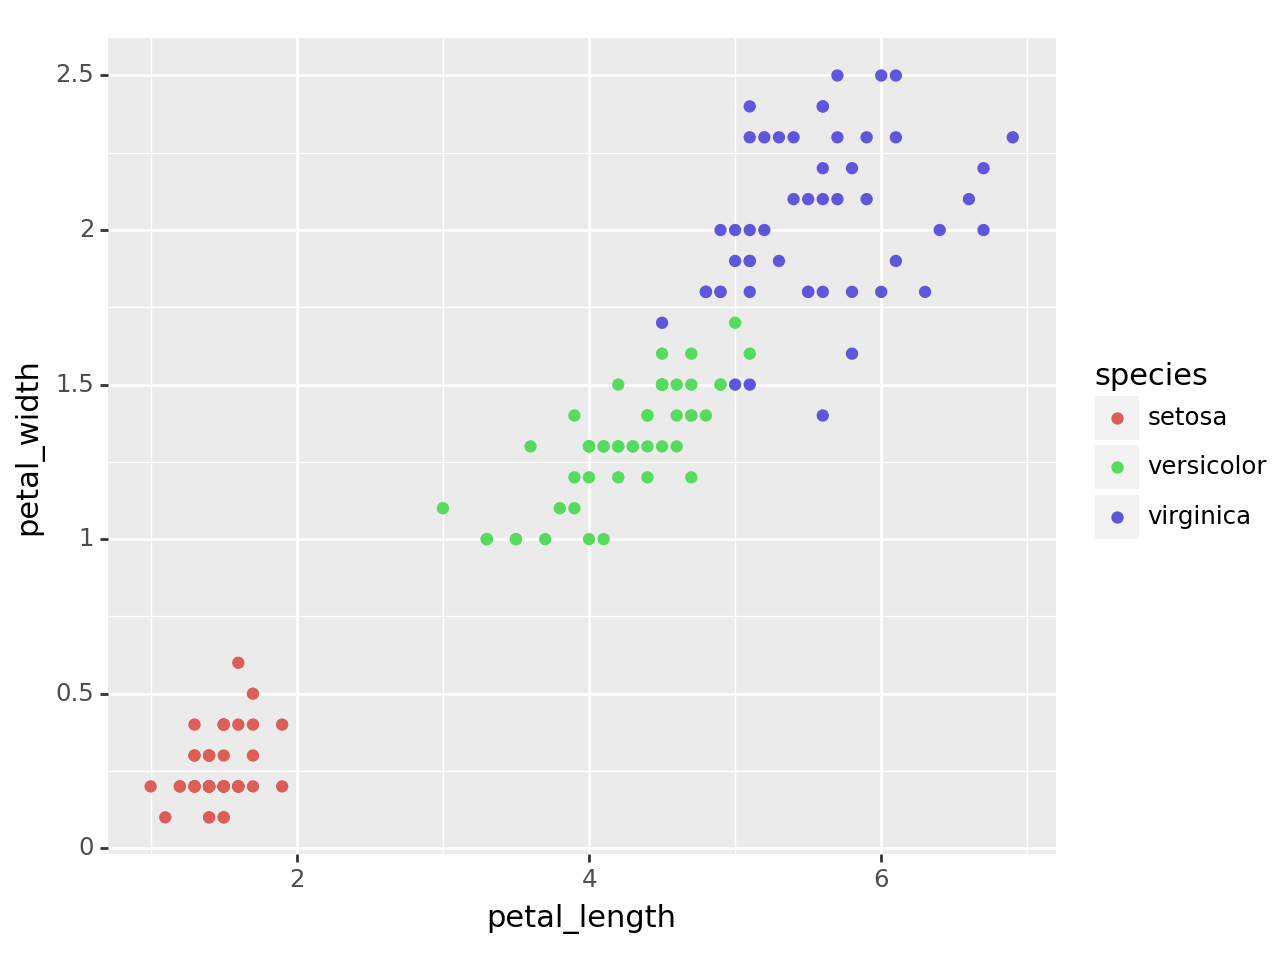

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import *

X_new.columns = ['petal_length','petal_width']

(
    X_new
    >> ggplot(aes(x='petal_length', y='petal_width', color=y))
     + geom_point()
)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cbaedb1f-e080-44ef-8c4c-e26e8e2ffbfc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>